## Problem Sets 0
For solving this problem set, I wrote a small library of helper functions called ps0. It contains some useful functions to help in better solving the problems. It's imported in the next cell below.

This file was assignment was done in a super rush, with the assumption that **_Done is better than Good_**. So it might be buggy.

However, if you spot anything you don't understand, I'm super glad to help. You can email me at ralphwantek add gmail dot com. Cheers!
#### 1. Input Images 
##### a. Find two interesting images to use. They should be color, rectangular in shape (NOT square). Pick one that is wide and one tall.

In [3]:
# First, import some useful libraries.
import numpy
import cv2
import os
from ps0 import *
import matplotlib.pyplot as plt
%matplotlib inline

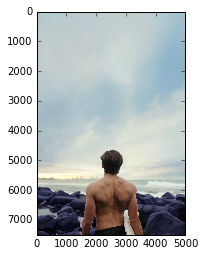

In [4]:
man_path = 'input/ps0-1-a-2.jpeg' 
driver_path = 'input/ps0-1-a-1.jpg'

driver = cv2.imread(driver_path)
man = cv2.imread(man_path)
#print man
show_img(man)

#### 2. Color Planes
##### a. Swap the red and blue pixels of image 1
##### Output: Store as ps0-2-a-1.png in the output folder

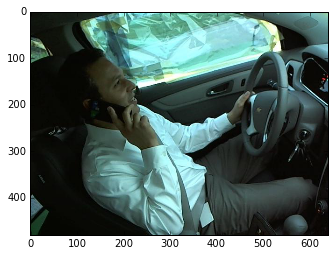

In [4]:
show_img(driver)

In [5]:
driver_bgr = driver[:,:,::-1]
cv2.imwrite('output/ps0-2-a-1.png', driver_bgr)

True

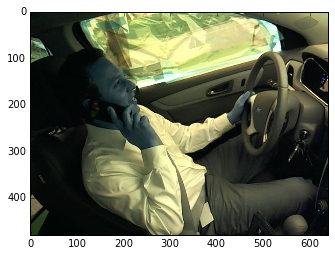

In [6]:
show_img(driver_bgr)

##### b. Create a monochrome image (img1_green) by selecting the green channel of image 1.
##### Output: ps0-2-b-1.png

In [6]:
driver_green = driver[:,:,1]
# man_green = man[:,:,1]
cv2.imwrite('output/ps0-2-b-1.png', driver_green)

True

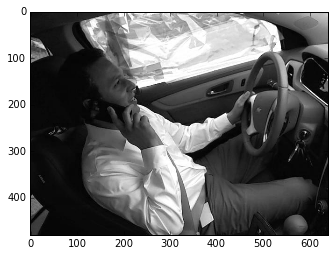

In [8]:
show_img(driver_green)

##### c. Create a monochrome image (img1_red) by selecting the red channel of image 1.
##### Output: ps0-2-c-1.png

In [9]:
driver_red = driver[:,:,0]
cv2.imwrite('output/ps0-2-c-1.png', driver_red)

True

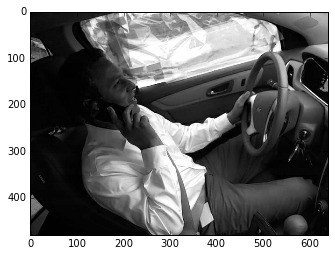

In [10]:
show_img(driver_red)

##### d. Which looks more like what you'd expect a monochrome image to look like? Would you expect a computer vision algorithm to work on one better than the other?
##### Output: Text Response in report ps0_report.pdf (Text Response written right inside this notebook)

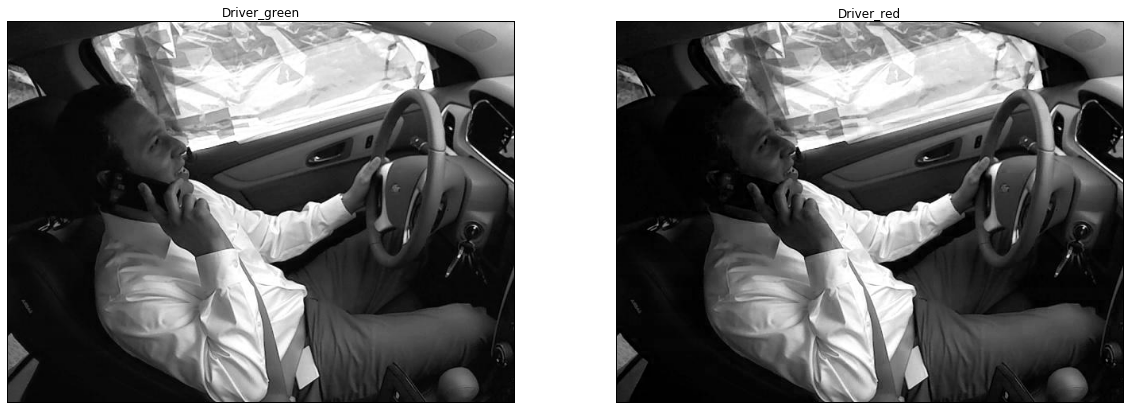

In [11]:
show_multiple_images({'Driver_green': driver_green,
                      'Driver_red': driver_red})

I'd expect the Green Image to look more like a monochrome image. I'd expect a Computer Vision Algorithm to work better on the Green image, because the distinction between pixel intensities seem to be better.

#### 3. Replacement of pixels (Note: For this, use the better channel from 2-b/2-c as monochrome versions.)
##### a. Take the center square region of 100x100 pixels of monochrome version of image 1 and insert them into the center of monochrome version of image 2

In [62]:
driver_man = replace_100_pix(driver, man)
cv2.imwrite('output/ps0-3-a-1.png', driver_man)

True

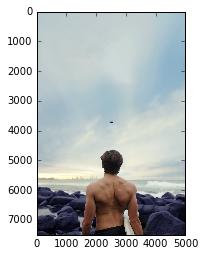

In [64]:
show_img(driver_man)

#### 4. Arithmetic and Geometric operations
##### a. What is the min and max of the pixel values of img1_green? What is the mean? What is the standard deviation?  And how did you compute these?
##### Output: Text response, with code snippets
Computed Using Standard Numpy Functions

In [216]:
min_driver_green = np.amin(driver_green)
max_driver_green = np.amax(driver_green)
mean_driver_green = np.mean(driver_green)
std_img1_green = np.std(driver_green)
print mean_driver_green

87.9190527344


##### b. Subtract the mean from all pixels, then divide by standard deviation, then multiply by 10 (if your image is 0 to 255) or by 0.05 (if your image ranges from 0.0 to 1.0). Now add the mean back in.
##### Output: ps0-4-b-1.png
I tried to solve it in two ways:
1. I simply calculated the mean, and then I added this mean to the driver image. The final image couldn't be read, so I cast the image into an uint8. I got the result below, with red patches in the image.
2. I used the opencv function cv2.add to add the mean to the image. I got the second image below.

Based on my approaches, could anyone tell me if I'm right or wrong? Thank you!

**Update**: I could get the numpy version to work, using `np.clip`.

In [227]:
driver_norm_float = driver_green - mean_driver_green
driver_green_norm = np.empty(driver_green.shape, dtype='uint8')
driver_green_norm = np.clip(driver_norm_float, 0, 255, out=driver_green_norm)

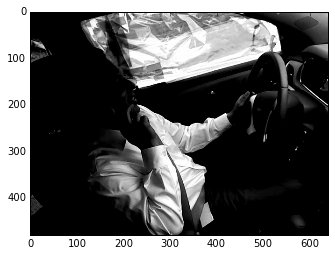

In [214]:
show_img(driver_norm)

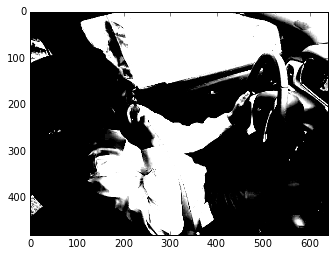

In [232]:
#driver_green_norm_2 = np.empty(driver_green.shape, dtype='uint8')
driver_green_norm_float_2 = driver_green_norm*10.0
#print driver_green_norm_float_2
driver_green_norm_2 = np.empty(driver_green.shape, dtype='uint8')
driver_green_norm_2 = np.clip(driver_green_norm_float_2, 0, 255, out=driver_green_norm_2)
show_img(driver_green_norm_2)

In [235]:
print center_100_pixels(driver_green_norm_3), '\n'
print center_100_pixels(driver_green_norm_2), '\n'
print center_100_pixels(driver_green_norm), '\n'
print center_100_pixels(driver_green), '\n'

[[ 87  87  87 ...,  87  87  87]
 [ 87  87  87 ...,  87  87  87]
 [ 87  87  87 ...,  87  87  87]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]] 

[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]] 

[[ 87  87  87 ...,  87  87  87]
 [ 87  87  87 ...,  87  87  87]
 [ 87  87  87 ...,  87  87  87]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]] 

[[ 21  25  49 ...,  73  72  69]
 [ 35  44  54 ...,  66  68  64]
 [ 55  52  56 ...,  57  48  47]
 ..., 
 [138 138 134 ..., 162 160 157]
 [124 122 127 ..., 148 136 134]
 [180 204 230 ..., 148 142 156]] 



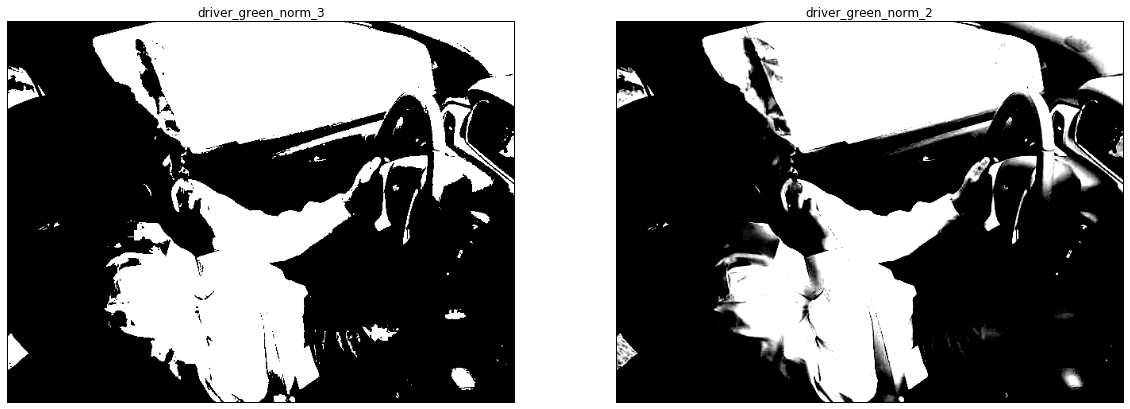

In [238]:
driver_green_norm_3_float = driver_green_norm_2 + mean_driver_green
driver_green_norm_3 = np.empty(driver_green.shape, dtype='uint8')
driver_green_norm = np.clip(driver_green_norm_3_float, 0, 255, out=driver_green_norm_3)
show_multiple_images({'driver_green_norm_3':driver_green_norm_3, 
                      'driver_green_norm_2':driver_green_norm_2})

In [239]:
cv2.imwrite('output/ps0-4-b-1.png', driver_green_norm_3)

True

##### c. Shift img1_green to the left by 2 pixels.
##### Output: ps0-4-c-1.png
Please check ps0.py for an implementation of `shift_img`

In [11]:
driver_green_shifted = shift_img(driver_green)

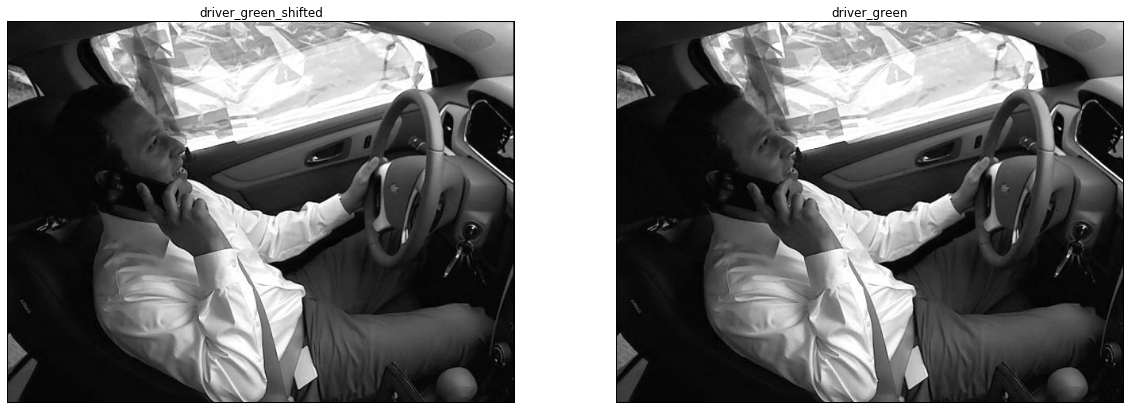

In [18]:
show_multiple_images({'driver_green_shifted':driver_green_shifted,
                      'driver_green':driver_green})

In [20]:
cv2.imwrite('output/ ps0-4-c-1.png', driver_green_shifted)

True

#### d. Subtract the shifted version of img1_green from the original, and save the difference image.
#### Output: ps0-4-d-1.png (make sure that the values are legal when you write the image so that you can 

In [21]:
driver_subtracted = cv2.subtract(driver_green, driver_green_shifted)

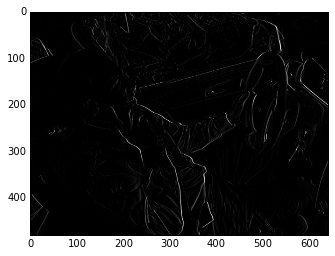

In [22]:
show_img(driver_subtracted)

In [34]:
print driver_green[-10:,-10:]

[[ 8  9 13 11 10  8  5  3  4  4]
 [ 8 10  8  7  7  6  5  5  6  8]
 [12  9  6  6  6  6  5  4  6  8]
 [11  8  6  6  6  6  5  4  6  8]
 [10  6  6  6  6  6  5  4  6  8]
 [ 8  5  6  6  6  6  5  4  6  8]
 [ 8  5  6  6  6  6  5  4  6  8]
 [ 8  5  6  6  6  6  5  4  6  8]
 [ 9  6  6  6  6  6  5  4  6  8]
 [10  7  6  6  6  6  5  4  6  8]]


In [33]:
print driver_green_shifted[-10:,-10:]

[[13 11 10  8  5  3  4  4  0  0]
 [ 8  7  7  6  5  5  6  8  0  0]
 [ 6  6  6  6  5  4  6  8  0  0]
 [ 6  6  6  6  5  4  6  8  0  0]
 [ 6  6  6  6  5  4  6  8  0  0]
 [ 6  6  6  6  5  4  6  8  0  0]
 [ 6  6  6  6  5  4  6  8  0  0]
 [ 6  6  6  6  5  4  6  8  0  0]
 [ 6  6  6  6  5  4  6  8  0  0]
 [ 6  6  6  6  5  4  6  8  0  0]]


In [35]:
print driver_subtracted[-10:,-10:]

[[0 0 3 3 5 5 1 0 4 4]
 [0 3 1 1 2 1 0 0 6 8]
 [6 3 0 0 1 2 0 0 6 8]
 [5 2 0 0 1 2 0 0 6 8]
 [4 0 0 0 1 2 0 0 6 8]
 [2 0 0 0 1 2 0 0 6 8]
 [2 0 0 0 1 2 0 0 6 8]
 [2 0 0 0 1 2 0 0 6 8]
 [3 0 0 0 1 2 0 0 6 8]
 [4 1 0 0 1 2 0 0 6 8]]


In [36]:
cv2.imwrite('output/ ps0-4-d-1.png', driver_subtracted)

True

Negative Pixels mean that the resulting pixel of the image will be zero, using 8-bits unsigned integers.

#### 5. Noise
##### a. Take the original colored image (image 1) and start adding Gaussian noise to the pixels in the green channel. Increase sigma until the noise is somewhat visible.
##### Output: ps0-5-a-1.png, text response: What is the value of sigma you had to use?

In [101]:
grid = np.random.randn(driver.shape[0], driver.shape[1])*0.4
grid = grid.astype('uint8')
driver_green_gaussian = cv2.add(driver_green, grid)

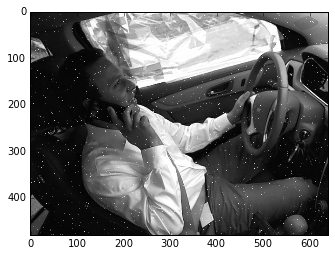

In [102]:
show_img(driver_green_gaussian)

In [103]:
cv2.imwrite('output/ ps0-5-a-1.png', driver_green_gaussian)

True

##### b. Now, instead add that amount of noise to the blue channel.
##### Output: ps0-5-b-1.png


In [104]:
driver_blue = driver[:,:,2]
driver_blue_gaussian = cv2.add(driver_green, grid)


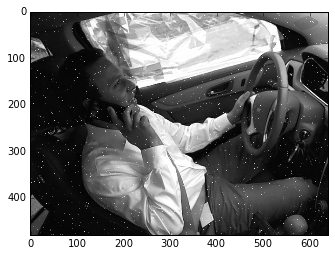

In [105]:
show_img(driver_blue_gaussian)

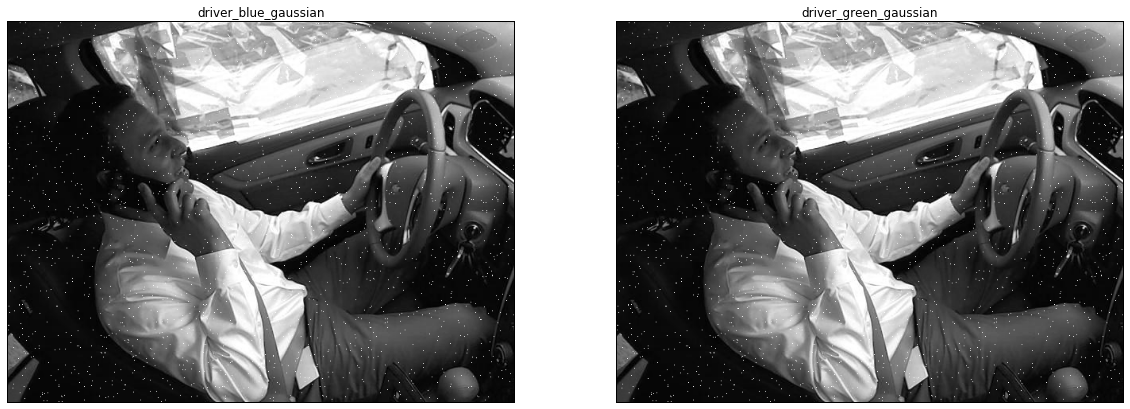

In [106]:
show_multiple_images({'driver_green_gaussian':driver_green_gaussian,
                      'driver_blue_gaussian':driver_blue_gaussian})

In [107]:
cv2.imwrite('output/ ps0-5-b-1.png', driver_blue_gaussian)

True

##### c. Which looks better? Why?
The blue image looks better. Because, originally, the blue pixel intensities were generally higher than the green pixel intensities.